Predicting House Value in thousands dollar($) base on the Number of Rooms  [REGRESSION MODEL]

Attribute definition of the dataframe.

CRIM : per capita crime rate by town.

ZN : proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS : proportion of non-retail business acres per town.

CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX : nitric oxides concentration (parts per 10 million).

RM : average number of rooms per dwelling.

AGE : proportion of owner-occupied units built prior to 1940.

DIS : weighted distances to five Boston employment centres.

RAD : index of accessibility to radial highways.

TAX : full-value property-tax rate per $10,000.

PTRATIO : pupil-teacher ratio by town.

B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT : % lower status of the population.

MEDV : Median value of owner-occupied homes in $1000's.

Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing



In [2]:
#load and display dataframe
boston=r"C:\Users\val-c\Desktop\machine learning dataset\supervised\boston_data.csv"
boston_read_data=pd.read_csv(boston)
boston_read_data.head(15)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
#no of rows and columns
boston_read_data.shape

(506, 15)

In [4]:
boston_read_data.drop(["Unnamed: 0"], axis=1, inplace = True) #drop columns

boston_read_data.columns #display current columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
#display data types for the dataframe
#boston_read_data.dtypes

In [6]:
#review & display missing value
boston_read_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
#reveiw dataframe and display any misssing value
boston_read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
#statistics data of the dataframe
boston_read_data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


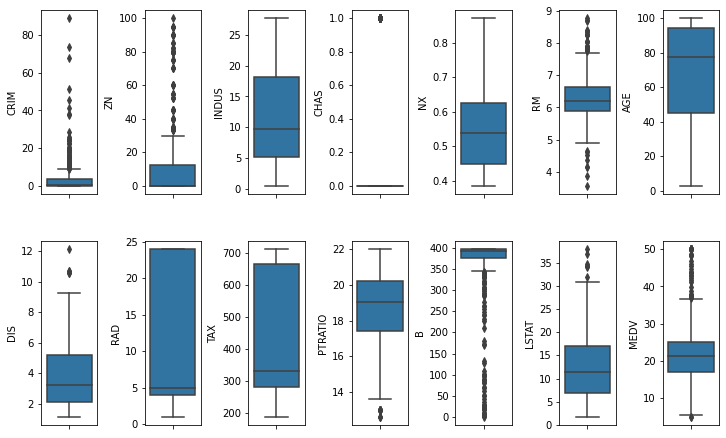

In [9]:
#creating a box plot
# review the statistics of the attributes

fig,ax=plt.subplots(ncols=7,nrows=2, figsize=(10,6))
index=0
ax=ax.flatten()
for col, value in boston_read_data.items():
    sns.boxplot(y=col,data=boston_read_data,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=4.0) # display plot
    

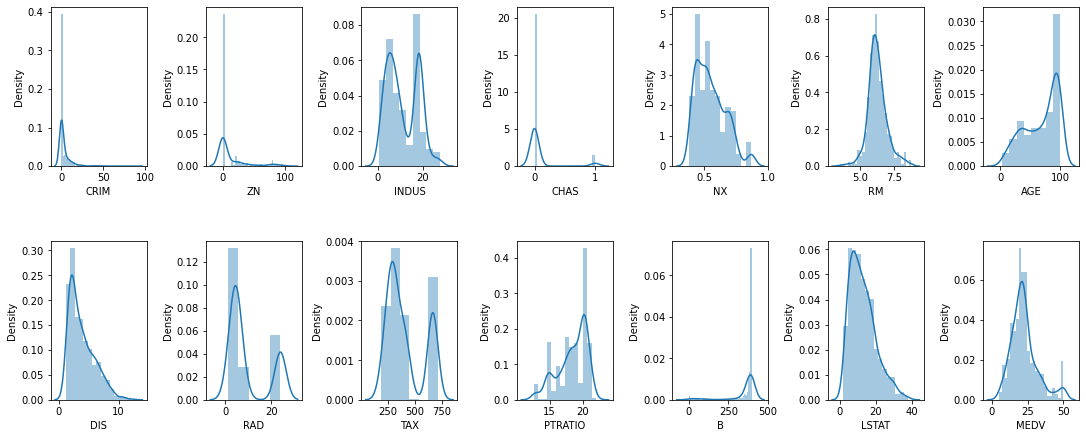

In [10]:
#creating a distribution plot
# review the statistics of the attributes

fig,ax=plt.subplots(ncols=7,nrows=2, figsize=(15,6))
index=0
ax=ax.flatten()
for col, value in boston_read_data.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=4.0) # display plot

In [11]:
#Performing NORMALIZATION
#data_attrbte=['CRIM','ZN','TAX','B',]
#boston_read_data[data_attrbte]=(boston_read_data[data_attrbte]-boston_read_data[data_attrbte].min())/boston_read_data[data_attrbte].max()-boston_read_data[data_attrbte].min()

In [12]:
#Performing NORMALIZATION
data_attrbte=['CRIM','ZN','TAX','B',]
boston_read_data[data_attrbte]=boston_read_data[data_attrbte]/boston_read_data[data_attrbte].max()

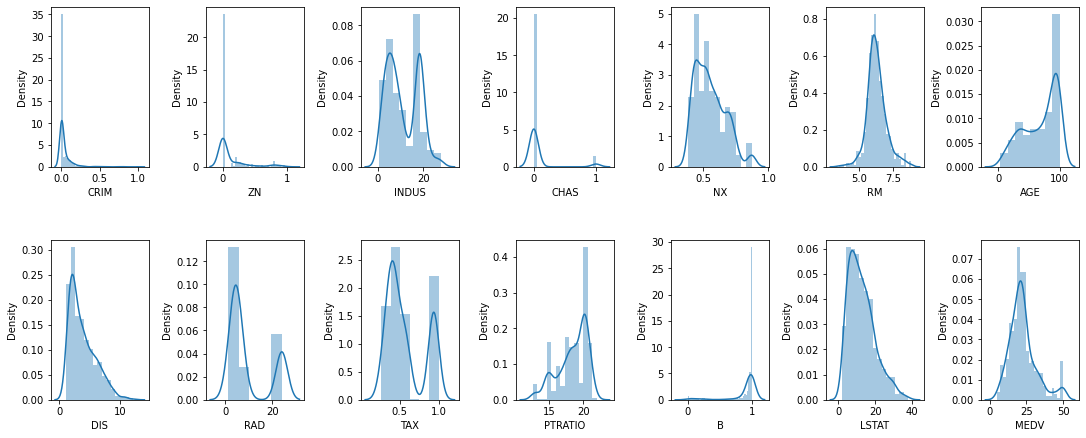

In [13]:
# display distribution plot once more after normalization
fig,ax=plt.subplots(ncols=7,nrows=2, figsize=(15,6))
index=0
ax=ax.flatten()
for col, value in boston_read_data.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=4.0) 

In [30]:
# Performing Standardization
scl=preprocessing.StandardScaler()
#fitting data
scl_fitt=scl.fit_transform(boston_read_data[data_attrbte])
scl_fitt=pd.DataFrame(scl_fitt, columns=data_attrbte)
scl_fitt

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052
...,...,...,...,...
501,-0.413229,-0.487722,-0.803212,0.387217
502,-0.415249,-0.487722,-0.803212,0.441052
503,-0.413447,-0.487722,-0.803212,0.441052
504,-0.407764,-0.487722,-0.803212,0.403225


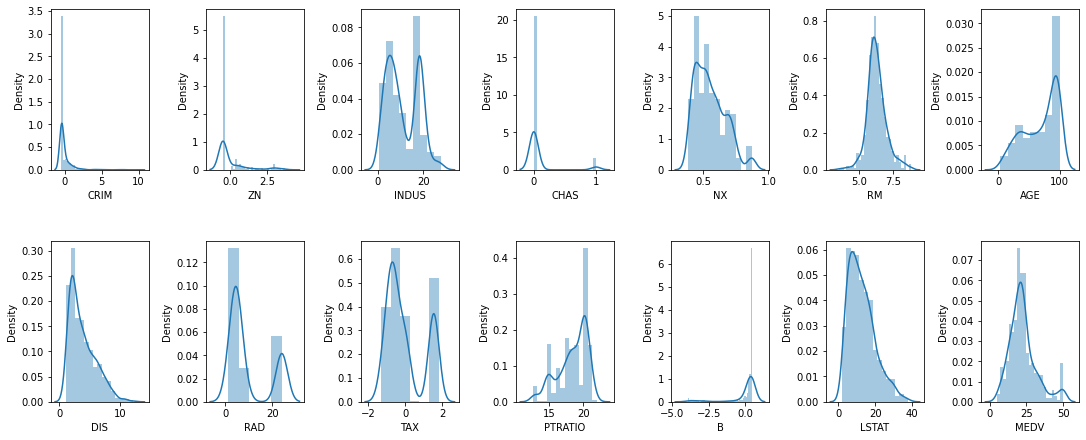

In [44]:
# Display distribution after Standardization

boston_read_data[data_attrbte]=scl_fitt[data_attrbte]
fig,ax=plt.subplots(ncols=7,nrows=2, figsize=(15,6))
index=0
ax=ax.flatten()
for col, value in boston_read_data.items():
    sns.distplot(value,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=4.0) 

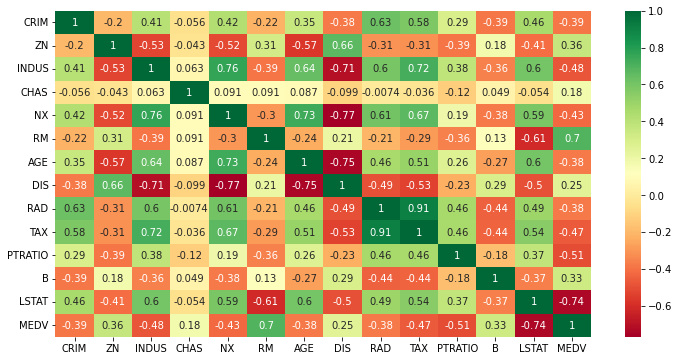

In [34]:
#Determining correlation between columns
plt.figure(figsize=(12,6))
corrl=boston_read_data.corr()
sns.heatmap(corrl, annot=True, cmap='RdYlGn')
plt.show()

(0.0, 52.779647393312565)

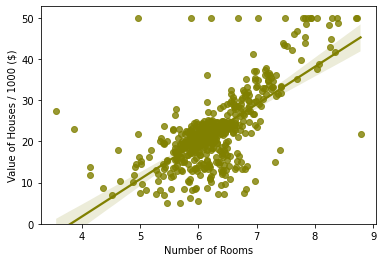

In [35]:
#plotting house value (MEDV) vs. number of room(RM)
# making a quick regression plot using seaborn library with regplot

sns.regplot(x=boston_read_data['RM'], y=boston_read_data['MEDV'], color='olive',)
#display figure
plt.ylabel('Value of Houses / 1000 ($)')
plt.xlabel('Number of Rooms')
plt.ylim(0)

In [16]:
#In above chart, price increases as the number of room increases

(0.0, 52.69343589680949)

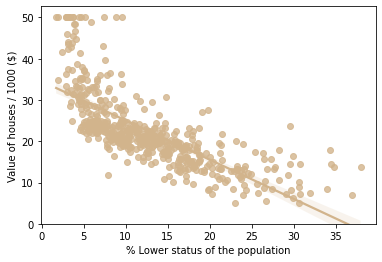

In [36]:
#plotting house value (MEDV) vs.% lower status of the population

sns.regplot(x=boston_read_data['LSTAT'], y=boston_read_data['MEDV'], color='tan',)
#display figure
plt.ylabel('Value of houses / 1000 ($)')
plt.xlabel('% Lower status of the population')
plt.ylim(0)
#plt.show()


In [18]:
#In above chart, price decreases as the % lower status of the population increases

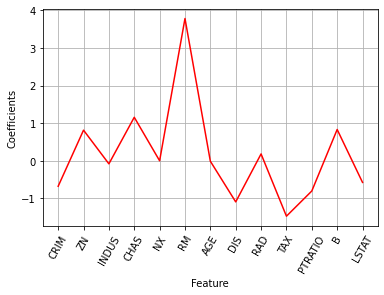

In [49]:
#performing lasso regression for the predictive feature
# select important feature in the dataframe

#Creating Feature-X and target-Y arrays ( SPLIT INPUT)
X=boston_read_data.drop('MEDV', axis=1).values
y=boston_read_data['MEDV'].values

value=boston_read_data.drop('MEDV', axis=1).columns
lasso=Lasso(alpha=0.1,)

#fitting and plot model feature
lasso_coef=lasso.fit(X,y).coef_
plt.plot(range(len(value)), lasso_coef, color='r')
plt.xticks(range(len(value)),value,rotation=60)
plt.ylabel('Coefficients')
plt.xlabel('Feature')
plt.grid()
plt.show() #display

In [38]:
#predicting house value from a single feature (no of rooms-RM)
X_rooms=X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [39]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

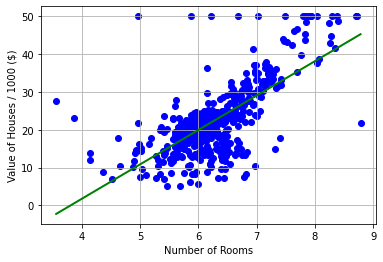

R^2 = 0.48352545599133423


In [46]:
#Fitting the Regression Model
#plotting house value (MEDV) vs. number of room(RM)

reg=LinearRegression(normalize=True)
reg.fit (X_rooms,y)

#prediction

_prediction_ =np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

plt.scatter(X_rooms,y,color='b')
plt.plot(_prediction_, reg.predict(_prediction_), color='g',lw=2)
plt.grid()
plt.ylabel('Value of Houses / 1000 ($)')
plt.xlabel('Number of Rooms')
plt.show()
#plt.ylim(0)
acc_score=reg.score(X_rooms,y) #accuracy score
print('R^2 =', acc_score)


Model Training

In [48]:
#Coefficient of Determination & Root Mean Square Error

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# Creatting the regressor, reg_all
reg_all = LinearRegression(normalize=True)

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predicting on the test data
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and Root Mean Square Error
print("R^2= {}".format(reg_all.score(X_test, y_test)))
print('\n')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE= {}".format(rmse))

R^2= 0.7112260057484932


RMSE= 4.6386899261728205


In [43]:
#Cross-Validation

from sklearn.model_selection import cross_val_score

# Creating a linear regression object
reg = LinearRegression()

# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(reg,X,y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print('\n')

# Print the avg 5-fold CV score
print("Avg of 5-Fold CV-Score = {}".format(np.mean(cv_scores)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


Avg of 5-Fold CV-Score = 0.3532759243958807
